In [1]:
from __future__ import (division, print_function)

In [135]:
%autoreload 2
%matplotlib inline

In [3]:
%%javascript
IPython.OutputArea.auto_scroll_threshold = 9999;

<IPython.core.display.Javascript object>

In [4]:
import matplotlib.pyplot as plt
import pandas as pd
import h5py
import seaborn as sns
sns.set_style('white')

In [5]:
import statsmodels as sm

In [6]:
from seaborn.distributions \
    import _statsmodels_bivariate_kde as bivariate_KDE

In [7]:
import sys
sys.path.append("../")
import extract_catalog as ec
import plot_gal_prop as plotg

In [8]:
partDMfile = "../../data/Illustris-1_" + \
    "00135_APillepich_KarenNG_ParticleData_Group_PartType1.h5"

data_f = h5py.File("../../data/Illustris-1_fof_subhalo" +
                   "_myCompleteHaloCatalog_00135.hdf5")

In [9]:
partDM = h5py.File(partDMfile)

In [10]:
no = 7
size=1e3

In [11]:
part_halos = h5py.File("../../data/DM_particles_clst_loc.h5")
haloEndIx = part_halos["loc"][...]

In [12]:
haloEndIx[5] - haloEndIx[4]

30285624

# the first halo id is 1 ..... different than other index scheme

to correct for consistency, we add the starting index of 0 

In [28]:
haloEndIx = [0] + list(haloEndIx)

In [102]:
partDM.keys()

[u'PartType1_Coordinates', u'PartType1_HaloID', u'PartType1_Masses']

In [105]:
partDM["PartType1_HaloID"][haloEndIx[clstNo]: haloEndIx[clstNo+1]] == 8

array([ True,  True,  True, ...,  True,  True,  True], dtype=bool)

In [84]:
crds = \
    partDM["PartType1_Coordinates"][:, haloEndIx[clstNo]: haloEndIx[clstNo+1]]

In [125]:
75 / 106.5

0.704225352112676

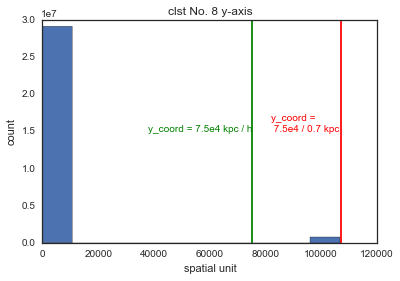

In [132]:
_ = plt.hist(crds[1])
plt.axvline(7.5e4 / 0.7, color='r')
plt.text(8.2e4, 1.5e7, "y_coord = \n 7.5e4 / 0.7 kpc", color='r')
plt.axvline(7.5e4, color='g')
plt.text(3.8e4, 1.5e7, "y_coord = 7.5e4 kpc / h", color='g')
plt.title("clst No. 8 y-axis")
plt.xlabel("spatial unit")
plt.ylabel("count")


In [98]:

np.abs(crds[1] % ) > 1e4

array([False, False, False, ...,  True,  True,  True], dtype=bool)

In [138]:
clstNo = 7
coord_dict = ec.get_DM_particles([clstNo], partDM, 
                                 dataPath="../../data/",
                                 verbose=True)

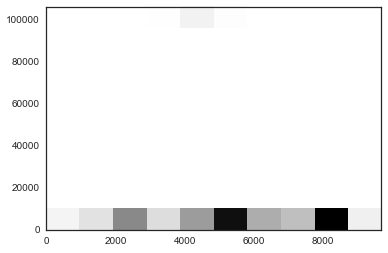

In [137]:
counts, xedges, yedges, image = \
    plt.hist2d(coord_dict[clstNo]["coords"][:, 0],
               coord_dict[clstNo]["coords"][:, 1])

In [37]:
?ec.wrap_and_center_coord

In [15]:
wrapped_coords = np.array([ec.wrap_and_center_coord(clst5[i, :]) 
                           for i in range(2)]).transpose()
min_coord1 = np.min(wrapped_coords[:, 0])
min_coord2 = np.min(wrapped_coords[:, 1])
coords = wrapped_coords - np.array([min_coord1, min_coord2])


In [16]:
def get_dens_and_grid(x, y, bw='normal_reference', 
                      gridsize=100, cut=4, 
                      clip=[-np.inf, np.inf], n_jobs=10):
    from seaborn.distributions \
    import _kde_support 
    import statsmodels.nonparametric.kernel_density as KDE
    KDEMultivariate = KDE.KDEMultivariate
    
    kde = KDEMultivariate(np.array([x, y]),
                          var_type='cc', bw=bw)
    kde.n_jobs = n_jobs
    
    x_support = _kde_support(x, kde.bw[0], gridsize, cut, clip)
    y_support = _kde_support(y, kde.bw[1], gridsize, cut, clip)
    xx, yy = np.meshgrid(x_support, y_support)
      
    z = kde.pdf([xx.ravel(), yy.ravel()]).reshape(xx.shape)
    return xx, yy, z
    

In [ ]:

axis1_range = \
    np.max(wrapped_coords[:, 0]) - np.min(wrapped_coords[:, 0])

(0, 3000)

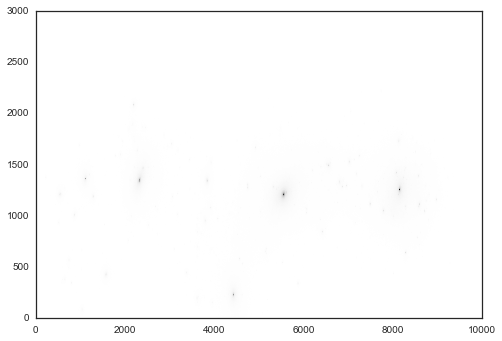

In [17]:
counts, xedges, yedges, image = \
    plt.hist2d(coords[:, 0], coords[:, 1], bins=1e3,
               range=[[0, 10000], [0, 3000]])
plt.ylim(0, 3000)

In [ ]:
xbin_width = xedges[1] - xedges[0] 

In [ ]:
ybin_width = yedges[1] - yedges[0]

In [ ]:
counts.shape

In [ ]:
ybin_width

In [ ]:
xbin_width

In [ ]:
plt.figure(figsize=(16, 16))
plt.imshow(counts.transpose(), cmap=plt.cm.BrBG,
           origin='lower')
plt.title(partDM['PartType1_HaloID'][haloEndIx[no-1]],
          fontsize=30)

```
get_dens_and_grid(wrapped_coords[:, 0], wrapped_coords[:, 1])
```